In [ ]:
# 필요한 package load
import pandas as pd
import numpy as np
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score

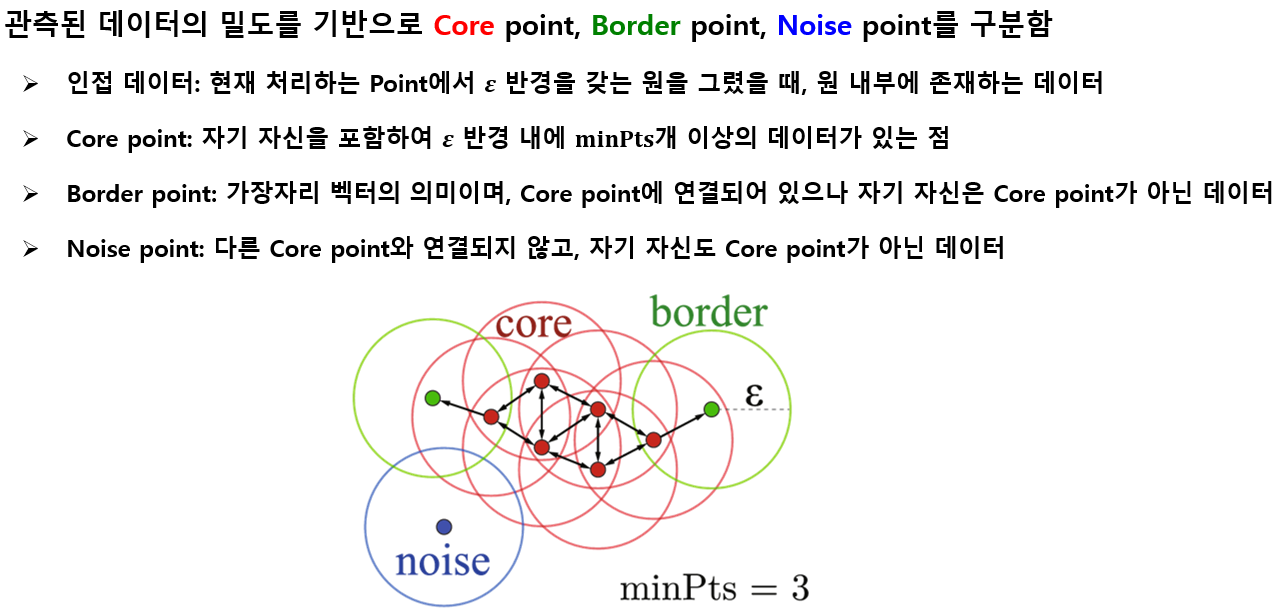

In [ ]:
# Data load (make_moons dataset in sklearn)
X, y = make_moons(n_samples=500, noise=0.1)
df = pd.DataFrame(X,y)
df = df.rename(columns={0: "X1", 1:"X2"})
df.head()

,X1,X2
1,0.665884,-0.487486
1,0.289895,-0.377558
0,1.161578,0.092581
0,-0.207754,0.946002
0,0.465619,1.015232


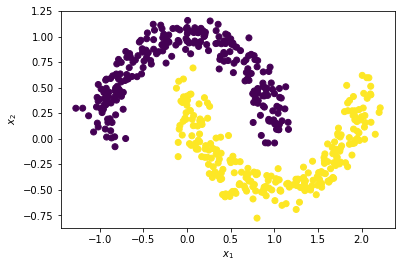

In [ ]:
# visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# DBSCAN method define & train
dbscan_cluster1 = DBSCAN()
dbscan_cluster1.fit(X)

DBSCAN()

In [ ]:
dbscan_cluster1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

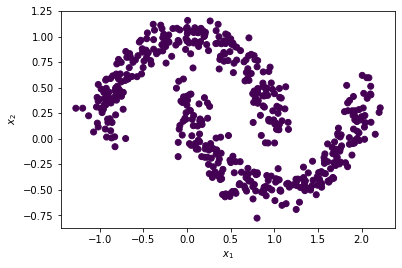

In [ ]:
# Visualizing DBSCAN (default setting)
plt.scatter(X[:, 0], 
            X[:, 1], 
            c = dbscan_cluster1.labels_, 
            label = y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# Number of Clusters
labels = dbscan_cluster1.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster1.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 1
Estimated no. of noise points: 0
v_measure = 0.0


In [ ]:
# Visualizing DBSCAN (parameter tuning)
dbscan_cluster = DBSCAN(eps=0.1, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.1, min_samples=8)

In [ ]:
dbscan_cluster.labels_

array([ 0,  8, -1,  1,  2,  0,  3,  9,  4, -1,  5, -1, -1, 12,  6, -1,  9,
        7,  8,  8,  2,  3,  8,  8,  0, -1,  3, 13, 10, -1,  1, -1,  9, 10,
        2, 10, -1,  2,  5, 14, 10, 10, 12,  7,  3, -1, 11, 11, 12,  3,  5,
        8,  3,  8,  3,  7,  9,  5, 10,  6, 10,  7, 13,  3,  3, 13,  5,  4,
        2, -1,  4, 10,  9,  3, 13, 10, 12,  3,  4, -1,  7, -1, -1,  7,  7,
        3, -1, -1, 11,  3,  7,  6, -1, -1, -1, -1, -1,  5, 10, 14,  4,  2,
        8, -1, 12,  0,  3,  1, -1, -1,  3, 10, 12,  3,  6, -1, -1, -1, 14,
        9, 13,  6,  3,  3, -1, 11,  1, -1, 11, -1,  5,  4, 10,  7,  1, 10,
       -1, -1,  9, 14, 11,  3,  1, -1,  2,  0, -1,  3, 11, 10,  6,  7,  3,
        3,  6, -1, -1,  9, 14,  3,  3, 11,  7, -1,  9, 11,  5,  7,  2,  5,
       -1, -1,  6,  6, 10,  1, 10,  7,  2,  3, 11,  1, -1,  3,  7,  1,  9,
        3, -1,  3, -1, 10,  5, -1,  9,  2,  0,  2, -1, 10, 10, -1,  0, -1,
       -1,  4, -1,  2,  6, 10, 10, 14,  3,  3,  4, 12, -1, 10,  3, -1,  2,
       -1,  6,  6,  4,  1

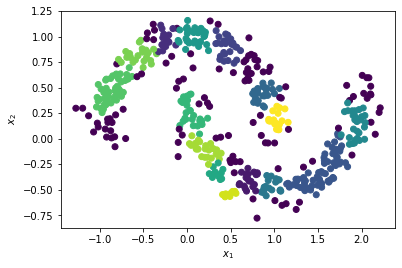

In [ ]:
# Visualizing DBSCAN (parameter tugning)
plt.scatter(X[:, 0], 
X[:, 1], 
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# Number of Clusters
labels = dbscan_cluster.labels_
N_clus = len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 15
Estimated no. of noise points: 112
v_measure = 0.334255315546863


## Find the Optimal value of Epsilon

- elbow point detection method to arrive at a suitable value of epsilon

In [ ]:
'''
적절한 MinPts 값을 확인하기 위해, 각 점에서의 k-nearest neighbors 계산 가능하며
average k-distance graph를 구성하여 가장 경사도가 높은 지점(elbow point)을 optimal value로 선정함
'''

# package load
from sklearn.neighbors import NearestNeighbors

# k-nearest neighbors define & train
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(df)


Text(0, 0.5, 'Distance')

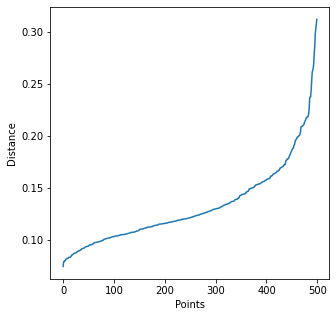

In [ ]:
# distance 계산 및 오름차순 정렬
distances, indices = neighbors.kneighbors(df)
distances = np.sort(distances[:,10], axis=0)

# visualize the distances
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

In [ ]:
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# package load
from kneed import KneeLocator

# Knee point location 찾기
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')


In [ ]:
print("knee point index: ", knee.knee)

knee point index:  428


distance of knee point 0.16936784914297856


<Figure size 360x360 with 0 Axes>

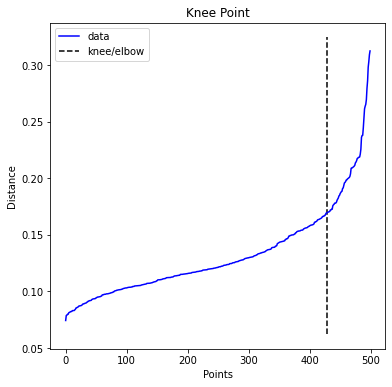

In [ ]:
# visualize the knee point
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print("distance of knee point", distances[knee.knee])

## Applying DBSCAN with optimal value of Epsilon (Epsilon = 0.163)

In [ ]:
# DBSCAN model define & train
dbscan_cluster = DBSCAN(eps=0.163, min_samples=8)
dbscan_cluster.fit(X)

DBSCAN(eps=0.163, min_samples=8)

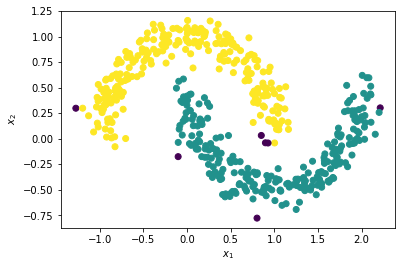

In [ ]:
# Visualizing DBSCAN
plt.scatter(X[:, 0], 
X[:, 1], 
c = dbscan_cluster.labels_, label=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

In [ ]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# Calculating v_measure
print('v_measure =', v_measure_score(y, labels))

Estimated no. of clusters: 2
Estimated no. of noise points: 7
v_measure = 0.9247660921388028
